In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 讀入資料

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 整理資料

In [3]:
Survived = np.array(df["Survived"]).reshape(891,)

Age = np.array(df["Age"]).reshape(891,)
Age[np.isnan(Age)] = 0

Sex = np.array(df["Sex"]).reshape(891,)
Sex[Sex=="male"] = 0
Sex[Sex=="female"] = 1

data = np.c_[Sex.ravel(),Age.ravel()]

# 用SVM做預測

In [4]:
from sklearn.svm import SVC
clf = SVC(gamma="auto")
clf.fit(data,Survived)
Survived_predict = clf.predict(data).reshape(Age.shape)

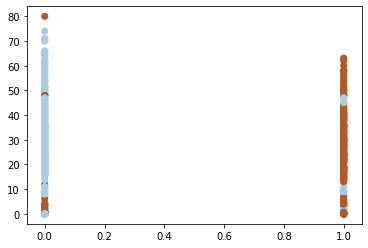

In [5]:
plt.scatter(data[:,0], data[:,1], c=Survived_predict, cmap="Paired")

# 預測資料和測試資料做相減看看預測準不準

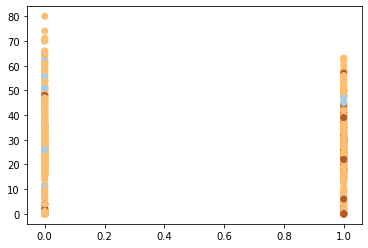

In [6]:
plt.scatter(data[:,0], data[:,1], c=Survived_predict-Survived, cmap="Paired")

# 預測準確率

In [7]:
df2 = pd.DataFrame(data, columns=["Sex","Age"])
df2["Survived"] = Survived
df2["Survived_predict"] = Survived_predict
error = df2[df2["Survived"]!=df2["Survived_predict"]]
error_rate = len(error)/len(df2)
correct_rate = 1-error_rate
print(f"預測正確率:{correct_rate*100}%")

預測正確率:80.8080808080808%
